<a href="https://colab.research.google.com/github/AngelicaDC/Enzime-structure-analysis/blob/main/Analisis_grupos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3
from scipy.stats import skew, kurtosis
from scipy import stats

In [3]:
!pip install plotly --upgrade
!pip install kaleido
import plotly.express as px

     |████████████████████████████████| 23.9 MB 13 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
     |████████████████████████████████| 79.9 MB 110 kB/s 


# Importación de Datasets:   

In [4]:
nom= ['alncris','alncrisff','aln','alnff','sc','s']
df=pd.DataFrame()
for tec in nom:
  locals()['df_'+tec]= pd.read_csv('/content/drive/MyDrive/Borradores Maestria/RESULTADOS_pruebas/prueba_'+tec+'/dfd_2'+tec+'.txt', sep='\t')
  #locals()['cn_'+tec]= (globals()['df_'+tec].groupby(by=['circuito','n'])['circuito'].count()).to_frame().rename(columns={'circuito': 'cuenta'}).reset_index()
  locals()['df_'+tec]["tecnica"] = tec
  df=pd.concat([df,locals()['df_'+tec]])
  
df.reset_index(inplace=True, drop=True)
df['circuito'] = df['circuito'].astype('str')
df['n'] = df['n'].astype('str')
df['circuito_hebras'] = df[["circuito","n"]].apply("_".join, axis=1)
df=df[['barril', 'tecnica', 'circuito', 'nraw', 'n', 'e', 'area', 'rmsd_ajuste', 'perim', 'alfa_prom', 'alfa_ds', 'rmsd', 'angtw', 'angtw_ds', 'circuito_hebras']]
df.head()

,barril,tecnica,circuito,nraw,n,e,area,rmsd_ajuste,perim,alfa_prom,alfa_ds,rmsd,angtw,angtw_ds,circuito_hebras
0,1uozA01,alncris,0,8,8,0.809905,118.270951,0.407674,40.612161,44.826051,13.071854,1.111382,32.329666,14.167689,0_8
1,1a0cA00,alncris,1,8,8,0.821656,119.611355,0.260670,41.070757,38.213587,11.743714,1.105803,30.052826,7.114144,1_8
2,1a3wA02,alncris,1,8,8,0.350654,121.090124,0.434760,39.039980,35.175785,10.625739,1.055893,25.652855,5.161767,1_8
3,1a53A00,alncris,1,8,8,0.203293,117.544935,0.357133,38.436440,34.270369,8.478744,0.976213,26.137985,6.786186,1_8
4,1a5aA00,alncris,0,8,8,0.701196,139.592458,0.742784,42.782220,33.575721,9.390412,0.852691,23.049655,9.704495,0_8


In [8]:
from google.colab import files
files.upload()

Saving dominios-tim.csv to dominios-tim.csv
Saving superfamily-tim.csv to superfamily-tim.csv


{'dominios-tim.csv': b'id_barril,id_dominio,longitud,resolucion\r\n4beuA02,3.20.20.10,217,1.15\r\n4beqA02,3.20.20.10,217,1.5\r\n4bf5A02,3.20.20.10,218,1.45\r\n4bf5B02,3.20.20.10,218,1.45\r\n4dzaA02,3.20.20.10,216,1.74\r\n4dyjA02,3.20.20.10,216,2.45\r\n4dyjB02,3.20.20.10,216,2.45\r\n4fs9A02,3.20.20.10,217,3.1\r\n4fs9B02,3.20.20.10,217,3.1\r\n5fagA02,3.20.20.10,220,1.51\r\n5fagD02,3.20.20.10,220,1.51\r\n5fagB02,3.20.20.10,221,1.51\r\n5fagC02,3.20.20.10,221,1.51\r\n5fajA02,3.20.20.10,220,1.64\r\n5fajB02,3.20.20.10,220,1.64\r\n5fajC02,3.20.20.10,220,1.64\r\n5fajD02,3.20.20.10,220,1.64\r\n5facA02,3.20.20.10,220,2.8\r\n5facB02,3.20.20.10,220,2.8\r\n5facC02,3.20.20.10,220,2.8\r\n5facD02,3.20.20.10,220,2.8\r\n1vfsA02,3.20.20.10,215,1.9\r\n1vfsB02,3.20.20.10,215,1.9\r\n1vfhA02,3.20.20.10,215,2\r\n1vftA02,3.20.20.10,215,2.3\r\n1vftB02,3.20.20.10,215,2.3\r\n1xfcB02,3.20.20.10,216,1.9\r\n1xfcA02,3.20.20.10,211,1.9\r\n2dy3C02,3.20.20.10,208,2.1\r\n2dy3D02,3.20.20.10,206,2.1\r\n2dy3B02,3.20.20.10,20

In [7]:
df_1_8_old = pd.read_excel('Barriles_old.xlsx')
df_1_8_old.head()

,id_barril,tecnica,circuito,nraw,n,alfa_prom,alfa_ds,rmsd,a_prom,a_ds,b_prom,b_ds,shear_McL,shear_proyec,R_McL,R_Murz,area_c,perim_c,twist_McL,angtw,angtw_ds,e,area_elip
0,1a0cA00,alncris,1,8,8,38.213587,11.743714,1.105803,3.804157,0.007278,4.534835,0.111427,7.508218,4.020067,7.541008,7.541008,178.652313,47.381549,0.039023,30.052826,7.114144,0.821656,119.611355
1,1a3wA02,alncris,1,8,8,35.175785,10.625739,1.055893,3.799256,0.008554,4.395483,0.191093,6.523153,4.306424,7.026005,7.026005,155.083932,44.145692,0.040525,25.652855,5.161767,0.350654,121.090125
2,1a53A00,alncris,1,8,8,34.270369,8.478744,0.976213,3.798974,0.009561,4.629148,0.145794,6.642391,4.136397,7.318912,7.318912,168.284060,45.986083,0.038442,26.137985,6.786186,0.203293,117.544935
3,1a5kC02,alncris,1,8,8,45.274504,18.382924,1.191304,3.797641,0.007422,4.517038,0.182015,9.607080,3.719187,8.386676,8.386676,220.968085,52.695036,0.036032,32.494040,13.612916,0.767183,143.139741
4,1aa1B02,alncris,1,8,8,31.701630,6.741634,0.785980,3.803051,0.014556,4.575379,0.111970,5.944683,3.499919,7.026385,7.026385,155.100684,44.148077,0.038514,25.199231,13.277511,0.572608,126.556865


In [8]:
df_desc = pd.read_excel('barriles.xlsx')
df_desc.head()

FileNotFoundError: ignored

In [9]:
df_familias = pd.read_csv('superfamily-tim.csv', sep="|",engine='python')
df_familias = df_familias[["id_dominio","s35_reps","total_reps","dominio"]]
df_familias.loc[df_familias['dominio'] == "'Ribulose bisphosphate carboxylase, large subunit, C-terminal domain'", 'dominio'] = "'RuBisCO, large subunit, C-ter domain'"
df_familias.head()

,id_dominio,s35_reps,total_reps,dominio
0,3.20.20.10,32,280,'Alanine racemase'
1,3.20.20.20,13,209,'Dihydropteroate synthase-like'
2,3.20.20.30,15,67,'Luciferase-like domain'
3,3.20.20.40,4,63,"'1, 4-beta cellobiohydrolase'"
4,3.20.20.60,25,639,'Phosphoenolpyruvate-binding domains'


In [10]:
df_ids = pd.read_csv('dominios-tim.csv')
df_ids.head()

,id_barril,id_dominio,longitud,resolucion
0,4beuA02,3.20.20.10,217,1.15
1,4beqA02,3.20.20.10,217,1.50
2,4bf5A02,3.20.20.10,218,1.45
3,4bf5B02,3.20.20.10,218,1.45
4,4dzaA02,3.20.20.10,216,1.74


### Editando barriles

### Uniendo dataframes para saber la superfamilia de cada barril Tim

In [11]:
df_merged=pd.merge(df_ids,df_familias[['id_dominio','dominio']],on='id_dominio', how='left')
df_merged.rename(columns={"id_barril":"barril"}, inplace=True)
df=pd.merge(df,df_merged[["barril","dominio"]],on="barril",how="left")
df.head()

,barril,tecnica,circuito,nraw,n,e,area,rmsd_ajuste,perim,alfa_prom,alfa_ds,rmsd,angtw,angtw_ds,circuito_hebras,dominio
0,1uozA01,alncris,0,8,8,0.809905,118.270951,0.407674,40.612161,44.826051,13.071854,1.111382,32.329666,14.167689,0_8,"'1, 4-beta cellobiohydrolase'"
1,1a0cA00,alncris,1,8,8,0.821656,119.611355,0.260670,41.070757,38.213587,11.743714,1.105803,30.052826,7.114144,1_8,'Divalent-metal-dependent TIM barrel enzymes'
2,1a3wA02,alncris,1,8,8,0.350654,121.090124,0.434760,39.039980,35.175785,10.625739,1.055893,25.652855,5.161767,1_8,'Phosphoenolpyruvate-binding domains'
3,1a53A00,alncris,1,8,8,0.203293,117.544935,0.357133,38.436440,34.270369,8.478744,0.976213,26.137985,6.786186,1_8,'Aldolase class I'
4,1a5aA00,alncris,0,8,8,0.701196,139.592458,0.742784,42.782220,33.575721,9.390412,0.852691,23.049655,9.704495,0_8,'Aldolase class I'


# Contando cuantos barriles hay de cada tipo por cada técnica

In [229]:
df.loc[df['tecnica']=="sc","circuito_hebras"].value_counts()

1_8     469
0_8     141
1_9     102
0_7      67
0_9      60
0_10     32
0_5      26
0_6      25
0_4       8
1_10      8
0_11      8
0_3       3
0_12      3
1_7       3
1_11      2
0_13      1
1_12      1
Name: circuito_hebras, dtype: int64

In [12]:
df_bars1=df[["circuito_hebras","tecnica"]]#.set_index(["tecnica"])
#df_bars1= df_bars1.groupby(by=["tecnica","cn"])["count"].sum().reset_index()
print(df_bars1['circuito_hebras'].unique())

['0_8' '1_8' '0_7' '0_5' '0_6' '0_4' '1_7' '0_3' '1_6' '0_10' '0_9' '0_11'
 '1_10' '1_9' '1_11' '0_12' '0_13' '1_12' '1_2']


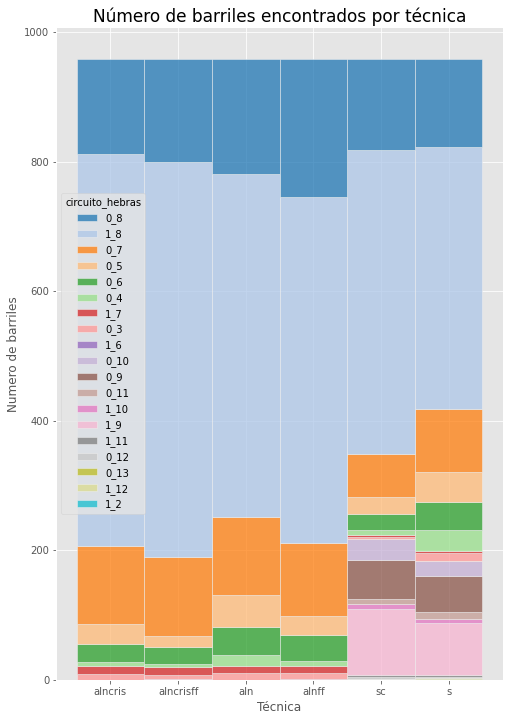

In [17]:
#sns.displot(data=df_bars1, x="tecnica", hue='cn',stat="count", ax=ax, multiple="stack",);
#sns.palplot(sns.color_palette("deep", 18))
with plt.style.context('ggplot'):
  fig = plt.figure(figsize=(8, 12))
  ax = fig.add_subplot()
  ax= sns.histplot(data=df_bars1, x="tecnica",hue='circuito_hebras', multiple="stack", palette="tab20",stat="count",
                   )#hue_order=["1_12","1_11","1_10","1_9","1_8","1_7","1_2","0_13","0_12","0_11","0_10","0_9","0_8","0_7","0_6","0_5","0_4","0_3"]
  ax.set_title('Número de barriles encontrados por técnica', size=17)
  ax.set(ylabel='Numero de barriles', xlabel='Técnica')


In [232]:
df.loc[(df['tecnica']=="aln") & (df["circuito_hebras"]=="1_7")]

,barril,tecnica,circuito,nraw,n,e,area,rmsd_ajuste,perim,alfa_prom,alfa_ds,rmsd,angtw,angtw_ds,circuito_hebras,dominio
2178,1xw8A00,aln,1,7,7,0.665051,116.300619,0.517494,38.840545,38.091217,12.070537,0.821545,33.892209,11.422591,1_7,'Glycoside hydrolase/deacetylase'
2252,2g95B02,aln,1,7,7,0.401329,133.322837,0.420515,40.990637,41.531212,23.386190,0.885043,37.577127,21.393480,1_7,'Aldolase class I'
2267,2i14A02,aln,1,7,7,0.809785,123.768020,0.273012,41.543015,32.725190,13.593875,0.873519,32.304251,19.538499,1_7,'Aldolase class I'
2382,2x5eA00,aln,1,7,7,0.588326,110.730520,0.258915,37.618232,41.890282,12.961389,0.853503,37.006591,12.895364,1_7,'Glycoside hydrolase/deacetylase'
2410,3a24A02,aln,1,8,7,0.636861,116.150981,0.521064,38.689432,34.541965,12.563516,0.970435,31.395493,16.218072,1_7,'Aldolase class I'
2424,3b0xA05,aln,1,7,7,0.832705,106.660888,0.323137,39.013772,41.925175,12.297109,1.221786,34.795065,18.095541,1_7,'Metal-dependent hydrolases'
2466,3dcpA00,aln,1,7,7,0.526257,93.378392,0.739524,34.424197,42.206908,7.909615,1.316237,34.399191,12.821612,1_7,'Metal-dependent hydrolases'
2511,3hftA00,aln,1,7,7,0.583683,141.944080,0.485750,42.577729,36.584508,16.328039,0.713382,36.579743,19.750437,1_7,'Glycoside hydrolase/deacetylase'
2752,4hd5A02,aln,1,7,7,0.809671,123.697892,0.121972,41.529124,44.452219,14.009975,1.121761,40.110280,15.792055,1_7,'Glycoside hydrolase/deacetylase'
2839,4wcjA00,aln,1,7,7,0.742308,117.279996,0.265918,39.544831,41.662986,10.108496,1.036237,36.018044,16.255632,1_7,'Glycoside hydrolase/deacetylase'


#### Encontrar las intersecciones de grupos de barriles entrer técnicas

In [18]:
grupo='0_3'
pd.Series(np.intersect1d(df.loc[(df['tecnica']=="alnff") & (df["circuito_hebras"]==grupo), "barril"],df.loc[(df['tecnica']=="alncrisff") & (df["circuito_hebras"]==grupo), "barril"])).shape
#setdiff1d

(6,)

#### Encontrar la diferencia entre series de los barriles

In [234]:
grupo='0_7'
pd.Series(np.setdiff1d(df.loc[(df['tecnica']=="alnff") & (df["circuito_hebras"]==grupo), "barril"],df.loc[(df['tecnica']=="alncrisff") & (df["circuito_hebras"]==grupo), "barril"])),\
pd.Series(np.setdiff1d(df.loc[(df['tecnica']=="alncrisff") & (df["circuito_hebras"]==grupo), "barril"],df.loc[(df['tecnica']=="alnff") & (df["circuito_hebras"]==grupo), "barril"]))

(0    1ypxA00
 1    2ffiA00
 2    4k36B00
 dtype: object, 0     1djxA02
 1     1e9iC02
 2     1j5sA01
 3     1uhvA02
 4     2q01A01
 5     3ciwA00
 6     3fokA00
 7     3n2oA02
 8     3qy7A00
 9     4acyA00
 10    4by3A00
 11    4i3gA01
 12    4oifB01
 dtype: object)

### Barriles nuevos con alncrisff

In [235]:
alncris_18 = df_alncris[(df_alncris['circuito']==1) & (df_alncris['n']==8)]['barril']
alncrisff_18 = df_alncrisff[(df_alncrisff['circuito']==1) & (df_alncrisff['n']==8)]['barril']
aln_18 = df_aln[(df_aln['circuito']==1) & (df_aln['n']==8)]['barril']
alnff_18 = df_alnff[(df_alnff['circuito']==1) & (df_alnff['n']==8)]['barril']
len(alncrisff_18)

610

In [236]:
print(f'Hay {len(alncrisff_18[~alncrisff_18.isin(alncris_18)])} barriles que encontramos con alncrisff pero no alncris \n{alncrisff_18[~alncrisff_18.isin(alncris_18)]}\n\
Hay {len(alncris_18[~alncris_18.isin(alncrisff_18)])} barriles que encontramos con alncris pero no alncrisff\n\
Hay {len(alnff_18[~alnff_18.isin(aln_18)])} barriles que encontramos con alnff pero no aln\n\
Hay {len(aln_18[~aln_18.isin(alnff_18)])} barriles que encontramos con aln pero no alnff\n\
Hay {len(alnff_18[~alnff_18.isin(alncrisff_18)])} barriles que encontramos con alnff pero no alncrisff\n\
Hay {len(alncrisff_18[~alncrisff_18.isin(alnff_18)])} barriles que encontramos con alncrisff pero no alnff')
#Hay que revisar los cuatro barriles nuevos que se encontraron con alncrisff
#alnff no sirve de mucho ya que alncris y alncrisff tienen todo sus barriles y mas


Hay 4 barriles que encontramos con alncrisff pero no alncris 
108    1iv8A01
350    2i5gA00
396    2pajA02
492    3a24A02
Name: barril, dtype: object
Hay 0 barriles que encontramos con alncris pero no alncrisff
Hay 5 barriles que encontramos con alnff pero no aln
Hay 0 barriles que encontramos con aln pero no alnff
Hay 0 barriles que encontramos con alnff pero no alncrisff
Hay 75 barriles que encontramos con alncrisff pero no alnff


# Dataframes de barriles por tipo


In [13]:
tipos=list(df_bars1['circuito_hebras'].unique())
#"1_8","1_9","1_7","1_10","0_11","0_10","0_9","0_8","0_7","0_6","0_5","0_4","0_3"
for tipo in tipos:
  locals()['df_'+tipo]= df.loc[df['circuito_hebras']==tipo]

#### Barriles con numero de herbas discordante
* El unico 1_2 encontrado con stride es 1_8 con alncris y aln.
* El unico 0_13 encontrado con sc y stride es 1_8 con alncris.
* De los tres 0_12, 1tv8B00	es abierto y el numero de hebras no es claro, con alncris le falta una hebra al menos. **editar aparte**       
2nt0A01	es 1_8 con alncris y aln.  
3e38A01 es abierto y el numero de hebras no es claro y tampoco la forma del barril. **editar aparte**   
* El único 1_12 encontrado con sc y strice es 1_8 con alncris y aln.
* De los once 0_11, seis son 1_8 con alncris.   
2anuA00 es abierto y el número de hebras no es claro, se parece a 3e38A01. **editar aparte**  
1djxA02 es 1_8, con alncris le falta una hebra. **editar aparte**   
2dskA00 es 1_8, con alncris 0_8 porque a una hebra le hacen falta residuos. **editar aparte**   
3rf9B02 es abierto y el número de hebras no es claro. **editar aparte**   
3e38A01 (lo mismo que con 0_12).
* De los dos 1_11 encontrados con sc y stride ambos son 1_8 con alncris.
* De los veintidos 0_3, siete son 1_8 y 3 son 0_8 con alguna otra técnica.  
2anuA00 (lo mismo que con 0_12) **editar aparte**   
2hnhA01	es UNK_7 HMD (Unir anotaciones sc y alncris) **editar aparte**   
2hpiA01 es UNK_7 HMD (Unir anotaciones sc y alncris) **editar aparte**   
2pe4A00 es 0_8 (Unir anotaciones sc y alncris) **editar aparte**   
2r8cA02 es UNK_UNK HMD parece de 8 hebras con una hoja beta extra **editar aparte**   
2x41A01 es 1_8 (Unir anotaciones sc y alncris) **editar aparte**   
2yb1A01 es 1_7 HDM (usar sc) **editar aparte**   
3e0fA01 es UNK_7 HMD (usar sc) **editar aparte**   
3f2bA02 es UNK_7 HMD (añadir la hebra que falta a alncris) **editar aparte**   
3kzsA01 no usar parece que está incompleta la estructura   
3ooqA02 es UNK_8 HMD (usar sc)
3zyzA01 es 1_8 (añadir la hebra que falta a alncrisff) **editar aparte**   
4dziB00 es UNK_8 HMD (añadir las dos hebras que faltan a alncrisff) **editar aparte**   
4njhA00 es 0_UNK (usar sc)
* De los cuarenta y siete 0_4, 21 son 1_8 y 13 son 0_8 con alguna otra técnica   
1j5sA01 es UNK_8 HMD (añadir hebra que falta a alncris) **editar aparte**   
1ofdA02 parecen varias hojas beta, 6 hebras pero no forman un barril. No usar.   
1t7lB01 es UNK_8 (añadir hebra que falta a alncrisff) **editar aparte** 






#####PENDIENTE SABER SI SON 0_8 U OTRO TIPO


* De los 290 0_8 encontrados con alncris|aln|sc|stride, 107 son 1_8 con otra técnica. Mientras que 183 conservaron su anotación 0_8









In [249]:
df_0_8.groupby("barril")["barril"].first()[~df_0_8.groupby("barril")['barril'].first().isin(df_1_8.groupby("barril")['barril'].first())] #.groupby("barril").first()

barril
1aw5A00    1aw5A00
1bqgA02    1bqgA02
1ccwB01    1ccwB01
1dpmA00    1dpmA00
1dysA00    1dysA00
            ...   
5jmuA00    5jmuA00
5k9xA00    5k9xA00
5kinC00    5kinC00
5swuA00    5swuA00
5tnvA00    5tnvA00
Name: barril, Length: 183, dtype: object

In [238]:
df.loc[df['circuito_hebras']=="0_4"].groupby("barril").first().shape

(47, 15)

In [ ]:
#Obteniendo los índices ("barriles") que se encuentran en el grupo 0_4
list(df.loc[df['circuito_hebras']=="0_4"].groupby("barril").first().index)
#Obteniendo en qué otros grupos se encontraron esos barriles con las demás técnicas
df[df['barril'].isin(list(df.loc[df['circuito_hebras']=="0_4"].groupby("barril").first().index))].sort_values(by="barril").head(100).tail(60)

In [ ]:
df[df['barril']=='2plcA00']#, df_1_8_old[df_1_8_old['id_barril']=='4uwmA00']

### Ordenando dataset con grupos de barriles inspeccionados
en su totalidad (1_7, 1_6, 1_9, 1_10) o muestreados (1_8, 0_8)

In [14]:
df_ordenado= pd.concat([df_1_8,df_1_7,df_1_6,df_0_8,df_1_9,df_1_10]).reset_index(drop=True).groupby("barril").first().reset_index()
df_ordenado[['tecnica','circuito_hebras']].value_counts()

tecnica    circuito_hebras
alncris    1_8                606
           0_8                143
sc         1_8                 51
           0_8                 27
           1_9                 19
alncrisff  0_8                 11
alncris    1_7                  9
alncrisff  1_8                  4
s          1_8                  3
sc         1_10                 2
alncrisff  1_6                  2
s          1_9                  1
alncrisff  1_7                  1
dtype: int64

In [242]:
df_ordenado[df_ordenado['circuito_hebras']=="1_6"].reset_index()

,index,barril,tecnica,circuito,nraw,n,e,area,rmsd_ajuste,perim,alfa_prom,alfa_ds,rmsd,angtw,angtw_ds,circuito_hebras,dominio
0,287,2c71A00,alncrisff,1,6,6,0.746811,107.980185,0.031341,37.986655,37.911278,22.455060,0.847012,44.511614,24.610377,1_6,'Glycoside hydrolase/deacetylase'
1,288,2cc0A00,alncrisff,1,6,6,0.668050,117.370486,0.259383,39.034021,40.530336,23.488369,1.080146,47.380843,23.725073,1_6,'Glycoside hydrolase/deacetylase'


In [243]:
pd.Series(np.intersect1d(df_8['barril'], df_1_9['barril']))  

0     1ctnA02
1     1djqA01
2     1e5nA00
3     1e6pA01
4     1hjxA01
       ...   
80    4wiwA01
81    5ay7B00
82    5dmmA00
83    5dqpB00
84    5gjnA02
Length: 85, dtype: object

In [105]:
pd.Series(np.intersect1d(df_1_9["barril"], df_0_8["barril"])).shape

(10,)

## Barriles obtenidos con criterios viejos vs los nuevos

In [244]:
print(f"Hay {len(df_1_8_old)} barriles 1_8 encontrados con los criterios viejos y {len(df_ordenado.loc[df_ordenado['circuito_hebras']=='1_8'])} con los nuevos")
print('interseccion entre barriles 1_8 sacados con los viejos criterios y con los nuevos es :',\
      len(pd.Series(np.intersect1d(df_ordenado.loc[df_ordenado['circuito_hebras']=='1_8', 'barril'], df_1_8_old["id_barril"]))))

Hay 604 barriles 1_8 encontrados con los criterios viejos y 664 con los nuevos
interseccion entre barriles 1_8 sacados con los viejos criterios y con los nuevos es : 579


In [245]:
print('barriles de 1_8 que solo estan con los viejos criterios : ',\
len(pd.Series(np.setdiff1d(df_1_8_old["id_barril"], df_ordenado.loc[df_ordenado['circuito_hebras']=='1_8', 'barril']))))
print('barriles de 1_8 que solo estan con los nuevos criterios : ',\
len(pd.Series(np.setdiff1d(df_ordenado.loc[df_ordenado['circuito_hebras']=='1_8', 'barril'], df_1_8_old["id_barril"]))))

barriles de 1_8 que solo estan con los viejos criterios :  25
barriles de 1_8 que solo estan con los nuevos criterios :  85


In [246]:
#Como se anotarion los barriles 1_8 que solo estan con los viejos criterios, usando los nuevos?
#df.loc[df['barril'].isin(pd.Series(np.setdiff1d(df_1_8_old["id_barril"], df_ordenado.loc[df_ordenado['circuito_hebras']=='1_8', 'barril'])))].groupby('barril').first()

#Cuales son los barriles 1_8 que solo estan con los nuevos criterios?
df.loc[df['barril'].isin(pd.Series(np.setdiff1d(df_ordenado.loc[df_ordenado['circuito_hebras']=='1_8', 'barril'], df_1_8_old["id_barril"])).to_list())].groupby("barril").first().head(90).tail(10)

,tecnica,circuito,nraw,n,e,area,rmsd_ajuste,perim,alfa_prom,alfa_ds,rmsd,angtw,angtw_ds,circuito_hebras,dominio
barril,,,,,,,,,,,,,,,
4f3hA00,alncris,0,7,7,0.841933,176.598909,0.067631,50.477725,32.340636,10.058199,0.982876,25.182509,15.495944,0_7,'EAL domain'
4hd5A02,alncris,1,7,7,0.809671,123.697892,0.121972,41.529124,44.978881,13.643115,1.137012,40.360321,15.628250,1_7,'Glycoside hydrolase/deacetylase'
4i3gA01,alncris,0,7,6,0.814101,147.543244,0.083119,45.447640,36.469640,7.996163,1.142671,33.872031,10.419493,0_6,"'Glycoside hydrolase, family 3, N-terminal dom..."
4if2A00,alncris,0,7,6,0.807608,133.607261,0.596828,43.121092,40.646796,22.707177,0.996339,31.618691,12.206123,0_6,'Metal-dependent hydrolases'
4jcmA01,alncris,1,8,8,0.631497,127.436354,0.555024,40.503442,35.504061,13.703476,0.733633,32.859441,14.602247,1_8,'Glycosidases'
4l6dA00,alncris,1,8,8,0.617762,129.735709,1.069818,40.814480,45.426135,16.793547,1.112682,36.236030,11.286714,1_8,'Metal-dependent hydrolases'
4mupB00,alncris,1,8,8,0.724639,132.545110,0.421023,41.873496,41.349221,16.556040,1.063531,33.867967,16.034165,1_8,'Metal-dependent hydrolases'
4v1xA02,alncris,1,8,8,0.796997,122.174341,0.840886,41.053086,45.255662,10.216276,1.257523,33.029937,19.614702,1_8,'Metal-dependent hydrolases'
4wcjA00,alncris,1,7,7,0.749443,112.641034,0.067050,38.823748,42.078491,9.766348,1.060722,36.182478,15.885482,1_7,'Glycoside hydrolase/deacetylase'


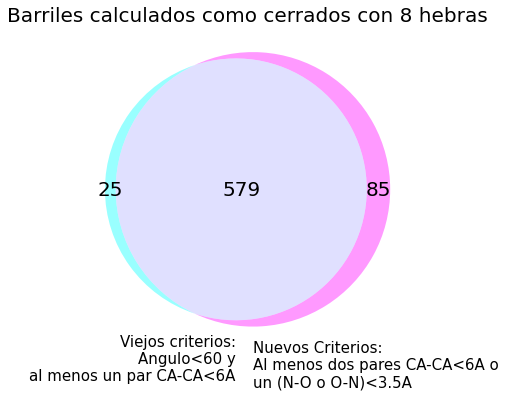

In [15]:
with plt.style.context('ggplot'):
  fig = plt.figure(figsize=(6, 6))
  out= venn2([set(df_1_8_old["id_barril"].to_list()), 
       set(df_ordenado.loc[df_ordenado['circuito_hebras']=='1_8', 'barril'].to_list())],
       set_labels=('Viejos criterios:\nAngulo<60 y\nal menos un par CA-CA<6A', 'Nuevos Criterios:\nAl menos dos pares CA-CA<6A o\nun (N-O o O-N)<3.5A'),
        alpha = 0.4,
        set_colors=("aqua", "magenta"))
  for text in out.set_labels:
   text.set_fontsize(15)
  for text in out.subset_labels:
   text.set_fontsize(20)
  plt.title("Barriles calculados como cerrados con 8 hebras", fontsize=20)
  plt.show()

# Estudio de Superfamilias

* Tenemos a 27 superfamilias en este estudio. Usamos es df_ordenado con anotaciones de 1_6, 1_7, 1_8, 1_9, 1_10 y 0_8.   

* Sabemos de antemano que todos los barriles 1_6 y 1_7 son verdaderos positivos (correctamente clasificados).

* Tambien sabemos que todos los barriles 1_9 y 1_10 son falsos positivos (porque en realidad todos son 1_8). Conservaremos su anotacion actual como referencia, pero despues los arreglaremos uno por uno.

* Nos damos a la tarea de quitar los 0_8 falsos positivos encontrados hasta el momento, posteriormente los incluiremos con su anotacion y calculos correctos.

In [15]:
df_ordenado['count']=1
falsos0_8= ['2ffiA00','2j6vA00','1jcjA00','2qr6A02','3bjsA02','3kw3A02','3rrxA01','5tnvA00']
#df_ordenado[~df_ordenado['barril'].isin(falsos0_8)]
df_agrupado_fam= pd.DataFrame(df_ordenado[~df_ordenado['barril'].isin(falsos0_8)].groupby(["dominio","circuito_hebras"])[["dominio","count"]].sum()).reset_index()

In [323]:
df_agrupado_fam.sort_values("count", ascending=False)

,dominio,circuito_hebras,count
24,'Glycosidases',1_8,191
6,'Aldolase class I',1_8,185
41,'Metal-dependent hydrolases',1_8,60
17,'Enolase-like C-terminal domain',0_8,41
14,'Divalent-metal-dependent TIM barrel enzymes',1_8,38
4,'Aldolase class I',0_8,32
39,'Metal-dependent hydrolases',0_8,30
2,'Alanine racemase',1_8,29
18,'Enolase-like C-terminal domain',1_8,24
51,'Phosphoenolpyruvate-binding domains',1_8,24


In [16]:
with plt.style.context('ggplot'):
  fig=px.treemap(df_agrupado_fam, path=['dominio','circuito_hebras'], values='count', labels="dominio",
            ids=None, width=1400, height=600)
  fig.data[0].textinfo = "label+value"
  fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
  fig.show()
  fig.write_image("/content/drive/MyDrive/Borradores Maestria/fig1.png")

# Elipses

In [17]:
#df_ordenado[~df_ordenado['barril'].isin(falsos0_8)]
df_E= df_ordenado[~df_ordenado['barril'].isin(falsos0_8)][df_ordenado[~df_ordenado['barril'].isin(falsos0_8)]['circuito_hebras'].isin(["1_8","1_7","1_6","0_8"])].reset_index(drop=True)
df_E.head(3)

,barril,tecnica,circuito,nraw,n,e,area,rmsd_ajuste,perim,alfa_prom,alfa_ds,rmsd,angtw,angtw_ds,circuito_hebras,dominio,count
0,1a0cA00,alncris,1,8,8,0.821656,119.611355,0.260670,41.070757,38.213587,11.743714,1.105803,30.052826,7.114144,1_8,'Divalent-metal-dependent TIM barrel enzymes',1
1,1a3wA02,alncris,1,8,8,0.350654,121.090124,0.434760,39.039980,35.175785,10.625739,1.055893,25.652855,5.161767,1_8,'Phosphoenolpyruvate-binding domains',1
2,1a53A00,alncris,1,8,8,0.203293,117.544935,0.357133,38.436440,34.270369,8.478744,0.976213,26.137985,6.786186,1_8,'Aldolase class I',1


### rmsd del ajuste de elipses

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



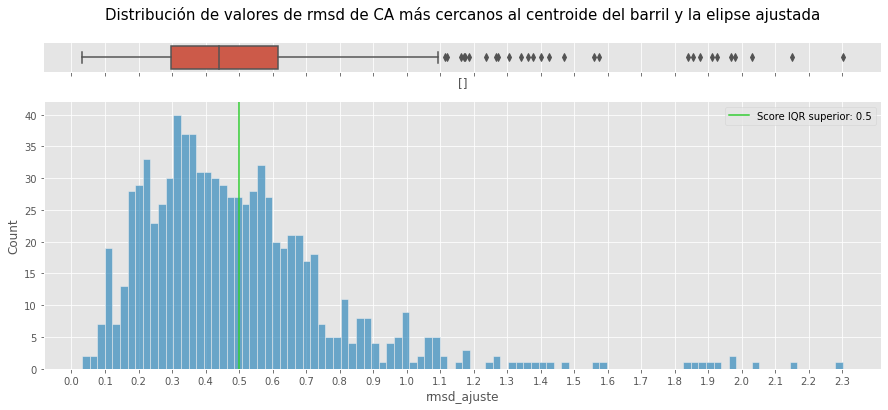

In [18]:
iqr_rmsd_ajuste = 0.5*(df_E['rmsd_ajuste'].quantile(0.75) - df_E['rmsd_ajuste'].quantile(0.25))
filtro_superior_rmsd_ajuste = 0.5#df_E['rmsd_ajuste'].quantile(0.75) + (iqr_rmsd_ajuste * 1.5)

with plt.style.context('ggplot'):
  fig,(ax_box,ax_hist) = plt.subplots(2,figsize=(15, 6),sharex=True,gridspec_kw={"height_ratios": (.10, .9)})
  sns.boxplot(df_E['rmsd_ajuste'], ax=ax_box)
  sns.histplot(df_E['rmsd_ajuste'], bins=100, ax=ax_hist, alpha=0.7)
  plt.axvline(filtro_superior_rmsd_ajuste, color='limegreen', label=f'Score IQR superior: {round(filtro_superior_rmsd_ajuste,2)}')
  ax_box.set(yticks=[])
  ax_box.set_xlabel([])
  sns.despine(ax=ax_box, left=True)
  sns.despine(ax=ax_hist)
  ax_hist.set_xticks(np.arange(0,2.4,0.1))
  ax_box.set_title("Distribución de valores de rmsd de CA más cercanos al centroide del barril y la elipse ajustada\n", fontsize=15)
  plt.legend();

In [327]:
print('Curtosis:', df_E['rmsd_ajuste'].kurt())  #Afilada
print('Asimetría:', df_E['rmsd_ajuste'].skew()) #Positiva

Curtosis: 6.956051549985467
Asimetría: 2.022006671839036


In [19]:
#Segmentemos el rmsd_ajuste para graficarlo posteriormente
bins = [0,0.25,0.45,0.65,0.853,1,2.4]
names = ["0-0.25"," - 0.45"," - 0.65"," - 0.85"," - 1"," - 2.3"]
segmentos = pd.cut(df_E['rmsd_ajuste'], bins, labels = names)
df_E['rango rmsd']=segmentos
Frecuencias = df_E['rmsd_ajuste'].groupby(segmentos).count()
Frecuencias

rmsd_ajuste
0-0.25     156
 - 0.45    287
 - 0.65    221
 - 0.85    106
 - 1        35
 - 2.3      44
Name: rmsd_ajuste, dtype: int64

####rmsd de elipse menor al Score IQR superior

In [20]:
#Guardamos un data set con los barriles cuyo rmsd de ajuste de elipse fuera menor al Score IQR superior
df_E_ea = df_E.loc[df_E['rmsd_ajuste'] <= filtro_superior_rmsd_ajuste, 
                   ['barril','tecnica','circuito','n','e','area','rango rmsd','perim',
                    'alfa_prom','alfa_ds','rmsd','angtw','angtw_ds','circuito_hebras','dominio','rmsd_ajuste','count']]
#Segmentemos el rmsd_ajuste tomando en cuenta filtro_superior_rmsd_ajuste
bins = [0,0.25,0.45,0.65,0.853,1,2.4]
names = ["0-0.25"," - 0.45"," - 0.65"," - 0.85"," - 1"," - 2.3"]
segmentos = pd.cut(df_E_ea['rmsd_ajuste'], bins, labels = names)
df_E_ea['rango rmsd']=segmentos
Frecuencias_ea = np.array([df_E_ea['rmsd_ajuste'].groupby(segmentos).count()])

In [330]:
df_E_ea.groupby("circuito_hebras")['circuito_hebras'].count()

circuito_hebras
0_8     88
1_6      2
1_7      8
1_8    400
Name: circuito_hebras, dtype: int64

### Excentricidad de elipses ajustadas

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

No handles with labels found to put in legend.


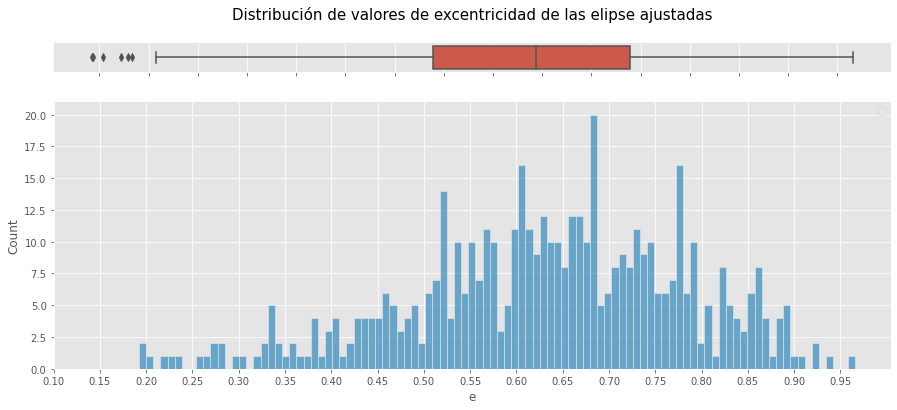

In [21]:
with plt.style.context('ggplot'):
  fig,(ax_box,ax_hist) = plt.subplots(2,figsize=(15, 6),sharex=True,gridspec_kw={"height_ratios": (.10, .9)})
  sns.boxplot(df_E_ea['e'], ax=ax_box)
  sns.histplot(df_E_ea['e'], bins=100, ax=ax_hist, alpha=0.7)
  #plt.axvline(df_8['rmsd_ajuste'].quantile(0.75) + (iqr_rmsd_ajuste * 1.5), color='limegreen', label='Score IQR superior')
  ax_box.set(yticks=[])
  ax_box.set_xlabel(None)
  sns.despine(ax=ax_box, left=True)
  sns.despine(ax=ax_hist)
  ax_hist.set_xticks(np.arange(0.1,1,0.05))
  ax_box.set_title("Distribución de valores de excentricidad de las elipse ajustadas\n", fontsize=15)
  plt.legend();

In [332]:
print('Curtosis:', df_E_ea['e'].kurt())  #Aplanada
print('Asimetría:', df_E_ea['e'].skew()) #Negativa

Curtosis: -0.01755582060077554
Asimetría: -0.440990917725092


### Area de elipse ajustada

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

No handles with labels found to put in legend.


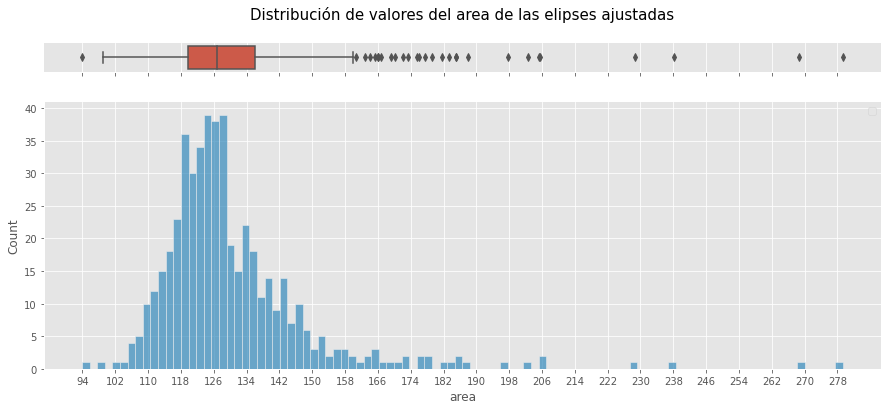

In [22]:
with plt.style.context('ggplot'):
  fig,(ax_box,ax_hist) = plt.subplots(2,figsize=(15, 6),sharex=True,gridspec_kw={"height_ratios": (.10, .9)})
  sns.boxplot(df_E_ea['area'], ax=ax_box)
  sns.histplot(df_E_ea['area'], bins=100, ax=ax_hist, alpha=0.7)
  ax_box.set(yticks=[])
  ax_box.set_xlabel(None)
  sns.despine(ax=ax_box, left=True) 
  sns.despine(ax=ax_hist)
  ax_hist.set_xticks(np.arange(94,280,8))
  ax_box.set_title("Distribución de valores del area de las elipses ajustadas\n", fontsize=15)
  plt.legend();

In [334]:
print('Curtosis:', df_E_ea['area'].kurt())  #Afilada
print('Asimetría:', df_E_ea['area'].skew()) #Positiva

Curtosis: 15.77599582605764
Asimetría: 3.086357144068938


###Area vs excentricidad

#### Coloreado por rango de rmsd

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



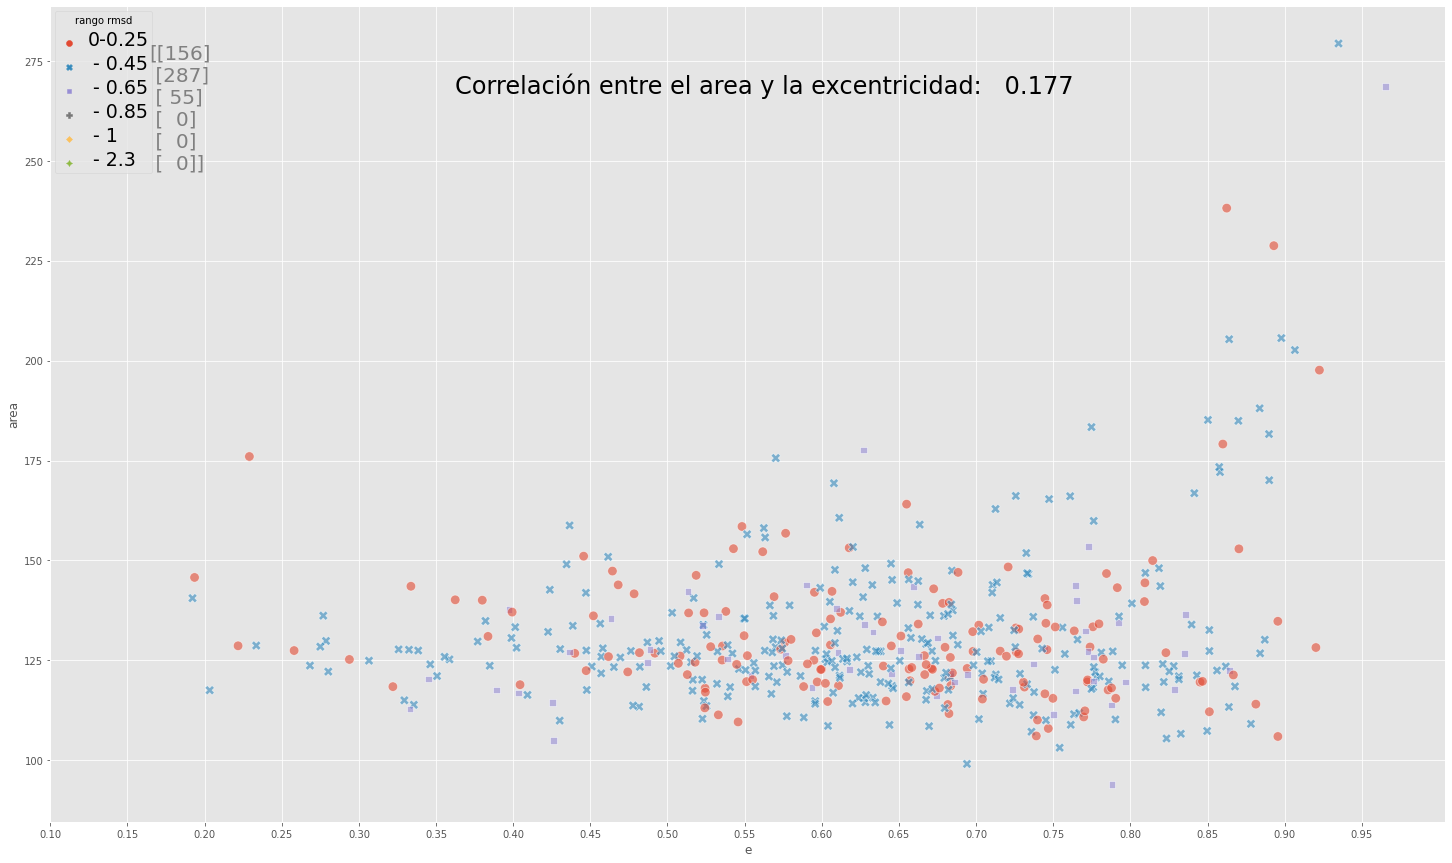

In [23]:
with plt.style.context('ggplot'):
  fig, ax = plt.subplots(figsize = (25, 15))
  sns.scatterplot(x=df_E_ea['e'], y=df_E_ea['area'], hue=df_E_ea['rango rmsd'], s=90, marker="o", style=df_E_ea['rango rmsd'], alpha=0.6)
  ax.set_xticks(np.arange(0.1,1,0.05))
  plt.setp(ax.get_legend().get_texts(), fontsize=19)
  correlacion=pd.Series(df_E_ea['e']).corr(pd.Series(df_E_ea['area']))
  fig.text(0.35, 0.8,f'Correlación entre el area y la excentricidad:\
   {round(correlacion,3)}', fontsize=24)
  fig.text(0.18, 0.73,  Frecuencias_ea.T, fontsize=20, color='grey');

####Coloreado por el tipo de barril

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



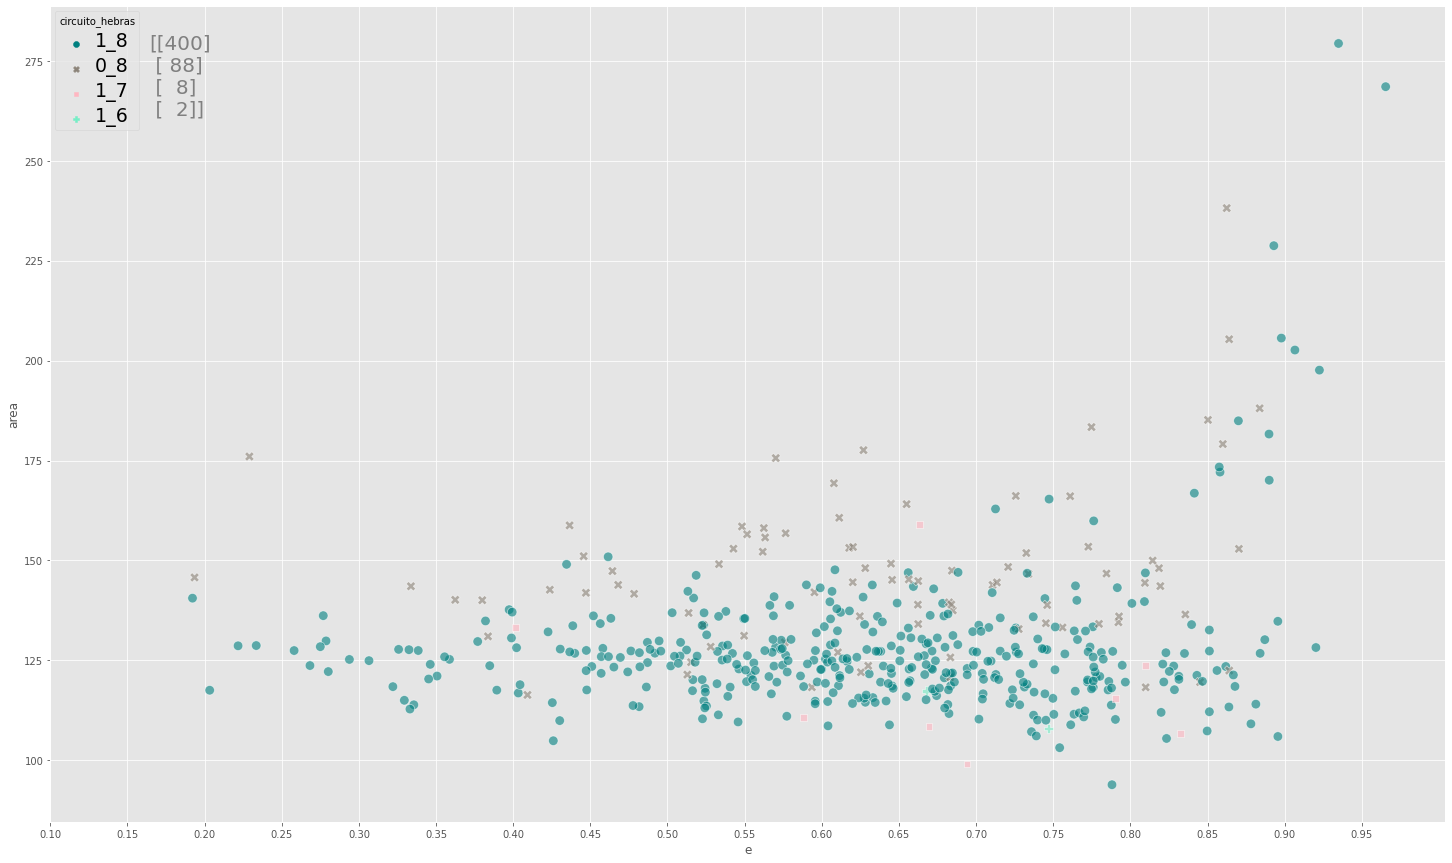

In [24]:
palette29=["#008080","#8B8378","#FFB6C1","#76EEC6","#458B74","#838B8B","#E3CF57","#FFE4C4","#C1CDCD","#000000","#0000FF","#8A2BE2","#9C661F","#A52A2A","#EE3B3B","#7AC5CD","#00008B","#FF9912","#7FFF00","#458B00","#6495ED","#006400","#CAFF70","#68228B","#E9967A","#FF1493","#8B0A50","#00FA9A","#CDB7B5"]
with plt.style.context('ggplot'):
  sns.set_palette(palette29)
  fig, ax = plt.subplots(figsize = (25, 15))
  sns.scatterplot(x=df_E_ea['e'], y=df_E_ea['area'], hue=df_E_ea['circuito_hebras'], s=90, marker="o", 
                  style=df_E_ea['circuito_hebras'], alpha=0.6)
  ax.set_xticks(np.arange(0.1,1,0.05))
  plt.setp(ax.get_legend().get_texts(), fontsize=19)
  plt.setp(ax.get_legend().get_texts(), fontsize=19)
  correlacion=pd.Series(df_E_ea['e']).corr(pd.Series(df_E_ea['area']))
  #ax.legend(bbox_to_anchor=(0.97,0.99), borderaxespad=0, fontsize=12)
  fig.text(0.18, 0.78,
           np.array([np.sort(np.array(df_E_ea.groupby("circuito_hebras")['circuito_hebras'].count()))[::-1]]).T,
           fontsize=20, color='grey');

##### Descripcion de los valores de area para barriles con 8n

In [25]:
#Descripcion de los valores de area para barriles con 8n
pd.concat([pd.DataFrame(df_E_ea.loc[df_E_ea["circuito_hebras"]=="1_8",'area'].describe()),
          pd.DataFrame(df_E_ea.loc[df_E_ea["circuito_hebras"]=="0_8",'area'].describe())],axis=1)

,area,area
count,400.000000,88.000000
mean,127.384385,146.552964
std,17.412401,19.871803
min,93.904786,116.374007
25%,119.142715,134.266391
50%,124.910878,144.457700
75%,130.429416,153.212116
max,279.326067,238.141945


from scipy import stats

fig, ax = plt.subplots(figsize = (10, 8))

mu, sigma = df_E_ea.loc[df_E_ea["circuito_hebras"]=="1_8",'area'].mean(), df_E_ea.loc[df_E_ea["circuito_hebras"]=="1_8",'area'].std() # media y desvio estandar
normal = stats.norm(mu, sigma)
x = np.linspace(normal.ppf(0.01), normal.ppf(0.99), 100)
fp = normal.pdf(x) # Función de Probabilidad
plt.plot(x, fp)

mu2, sigma2 = df_E_ea.loc[df_E_ea["circuito_hebras"]=="0_8",'area'].mean(), df_E_ea.loc[df_E_ea["circuito_hebras"]=="0_8",'area'].std() # media y desvio estandar
normal2 = stats.norm(mu2, sigma2)
x2 = np.linspace(normal2.ppf(0.01), normal2.ppf(0.99), 100)
fp2 = normal2.pdf(x2) # Función de Probabilidad
plt.plot(x2, fp2)

plt.axvline(mu, color='steelblue', label=f'media de 1_8: {round(mu,2)}A^2')
plt.axvline(mu2, color='darkorange', label=f'media de 0_8: {round(mu2,2)}A^2')
plt.title('Distribución Normal')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.legend()


plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



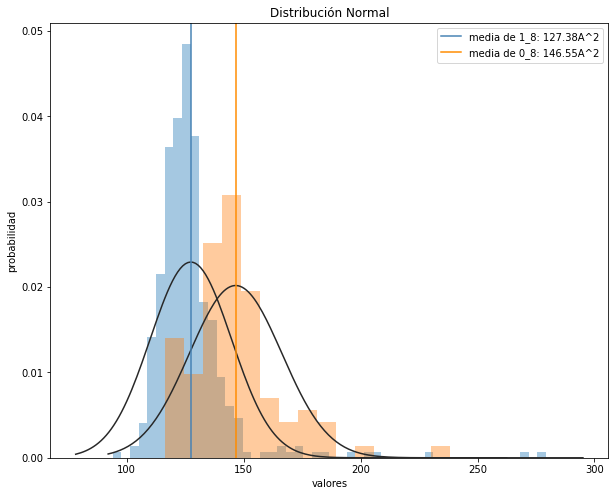

In [26]:
from scipy.stats import norm
mu= df_E_ea.loc[df_E_ea["circuito_hebras"]=="1_8",'area'].mean()
mu2= df_E_ea.loc[df_E_ea["circuito_hebras"]=="0_8",'area'].mean()
fig, ax = plt.subplots(figsize = (10, 8))
sns.distplot(df_E_ea.loc[df_E_ea["circuito_hebras"]=="1_8",'area'], fit=norm, kde=False)
sns.distplot(df_E_ea.loc[df_E_ea["circuito_hebras"]=="0_8",'area'], fit=norm, kde=False)
plt.axvline(mu, color='steelblue', label=f'media de 1_8: {round(mu,2)}A^2')
plt.axvline(mu2, color='darkorange', label=f'media de 0_8: {round(mu2,2)}A^2')
plt.title('Distribución Normal')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.legend();

In [27]:
#Prueba de homogeneidad para ver si dos muestras tienen diferente o igual varianza: Levene's test
_ , p_levene = stats.levene(df_E_ea.loc[df_E_ea["circuito_hebras"]=="1_8",'area'], df_E_ea.loc[df_E_ea["circuito_hebras"]=="0_8",'area'], center='mean')
#pvalue > 0.05 significa que las dos varianzas son iguales.
print(f"p_value de levene test: {format(p_levene,'.2E')}. Menor a 0.05, por lo tanto las varianzas son diferentes")

#t-test prueba de hipotesis con varianzas diferentes
_ , p_test = stats.ttest_ind(df_E_ea.loc[df_E_ea["circuito_hebras"]=="1_8",'area'], df_E_ea.loc[df_E_ea["circuito_hebras"]=="0_8",'area'], equal_var = False)
#pvalue > 0.05 significa que no hay diferencia significativa entre las dos variables. 
print(f"p_value de t-test para vianzas desiguales: {format(p_test,'.2E')}. Menor a 0.05, por lo tanto hay diferencia significativa entrer las variables")

p_value de levene test: 1.17E-02. Menor a 0.05, por lo tanto las varianzas son diferentes
p_value de t-test para vianzas desiguales: 1.35E-13. Menor a 0.05, por lo tanto hay diferencia significativa entrer las variables


Estimación combinada de la desviación estándar para cuando las varianzas sean iguales

sp2 = vpool = (((len(df_E_ea.loc[df_E_ea["circuito_hebras"]=="0_8",'area']) -1) * df_E_ea.loc[df_E_ea["circuito_hebras"]=="0_8",'area'].var()) +\
((len(df_E_ea.loc[df_E_ea["circuito_hebras"]=="1_8",'area']) -1) * df_E_ea.loc[df_E_ea["circuito_hebras"]=="1_8",'area'].var())) /\
(len(df_E_ea.loc[df_E_ea["circuito_hebras"]=="0_8",'area'])+len(df_E_ea.loc[df_E_ea["circuito_hebras"]=="1_8",'area'])-2)


denominador = np.sqrt((df_E_ea.loc[df_E_ea["circuito_hebras"]=="0_8",'area'].std() / len(df_E_ea.loc[df_E_ea["circuito_hebras"]=="0_8",'area'])) + (df_E_ea.loc[df_E_ea["circuito_hebras"]=="1_8",'area'].std()/len(df_E_ea.loc[df_E_ea["circuito_hebras"]=="1_8",'area'])))
z= (df_E_ea.loc[df_E_ea["circuito_hebras"]=="0_8",'area'].mean() - df_E_ea.loc[df_E_ea["circuito_hebras"]=="1_8",'area'].mean())/denominador
stats.ttest_ind(df_E_ea.loc[df_E_ea["circuito_hebras"]=="1_8",'area'], df_E_ea.loc[df_E_ea["circuito_hebras"]=="0_8",'area'])

### Area vs excentricidad por superfamilias

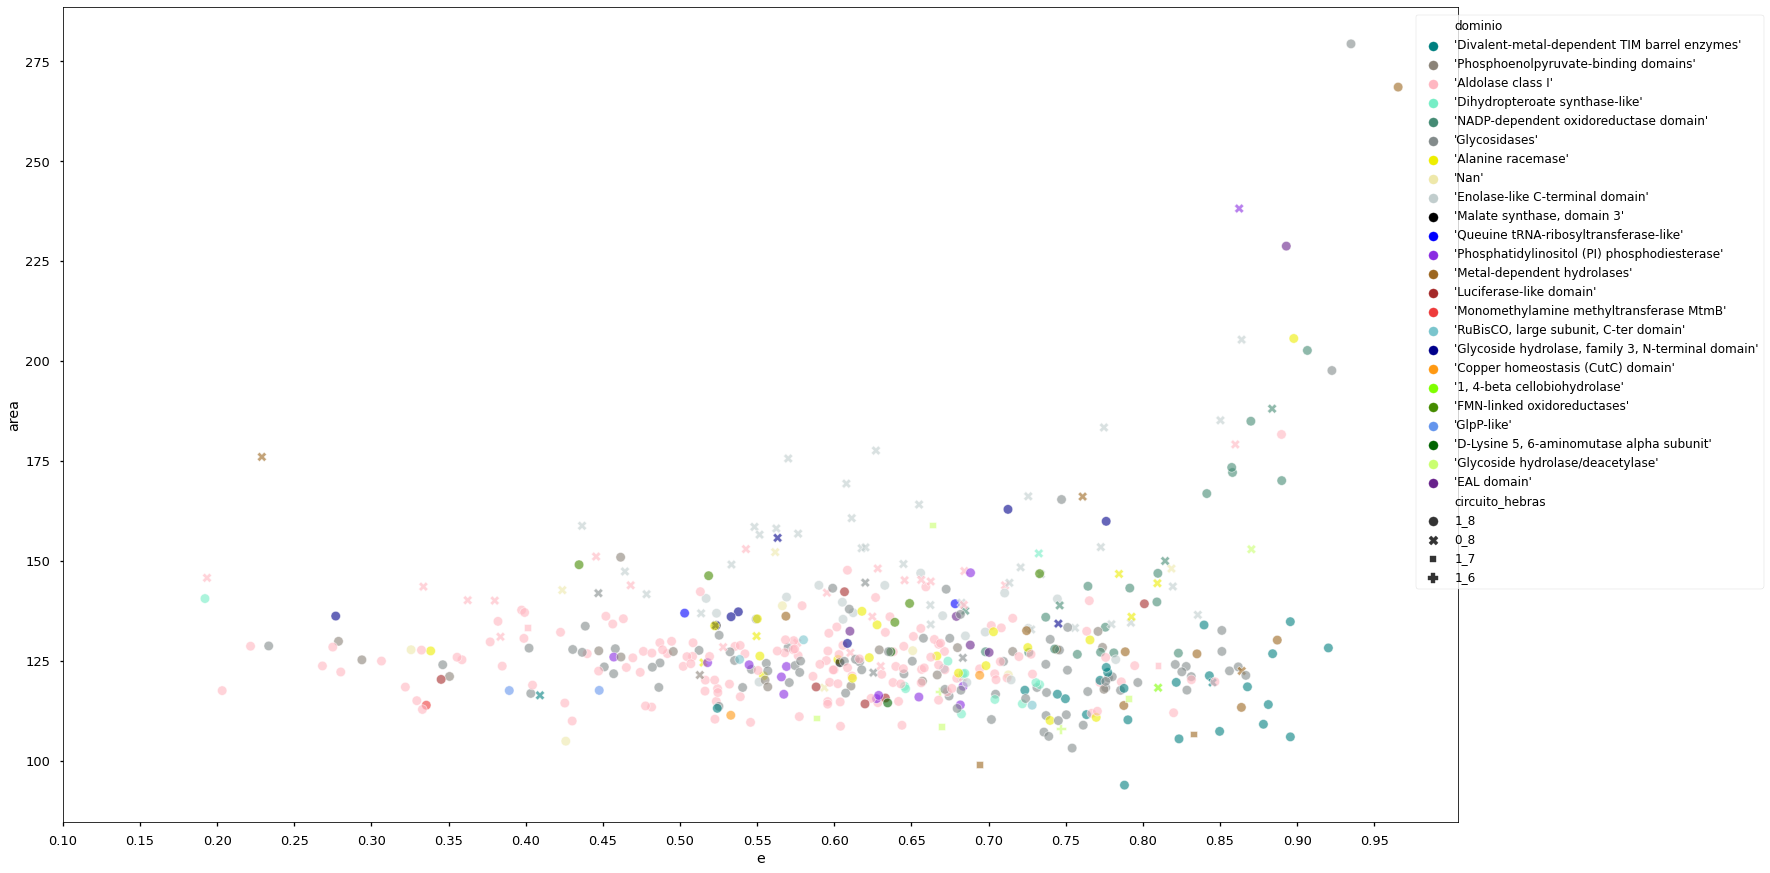

In [28]:
palette29=["#008080","#8B8378","#FFB6C1","#76EEC6","#458B74","#838B8B","#EEEE00","#EEE8AA","#C1CDCD","#000000","#0000FF","#8A2BE2","#9C661F","#A52A2A","#EE3B3B","#7AC5CD","#00008B","#FF9912","#7FFF00","#458B00","#6495ED","#006400","#CAFF70","#68228B","#E9967A","#FF1493","#8B0A50","#00FA9A","#CDB7B5"]
with plt.style.context("seaborn-talk"):
  sns.set_style()
  sns.set_palette(palette29)
  fig, ax = plt.subplots(figsize = (25, 15))
  sns.scatterplot(x=df_E_ea['e'], y=df_E_ea['area'], hue=df_E_ea['dominio'], s=90, marker="o", 
                  style=df_E_ea['circuito_hebras'], alpha=0.6)
  ax.set_xticks(np.arange(0.1,1,0.05))
  #plt.setp(ax.get_legend().get_texts(), fontsize=19)
  correlacion=pd.Series(df_E_ea['e']).corr(pd.Series(df_E_ea['area']))
  ax.legend(bbox_to_anchor=(0.97,0.99), borderaxespad=0, fontsize=12)


In [29]:
df_agrupado_fam_ea = (df_E_ea.groupby(["circuito_hebras","dominio"])[["barril","count"]].sum()).reset_index()
with plt.style.context('ggplot'):
  fig=px.treemap(df_agrupado_fam_ea, path=['circuito_hebras','dominio'], values='count', labels="dominio",
            ids=None, width=1400, height=550)
  fig.data[0].textinfo = "label+value"
  fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
  fig.show()
  #fig.write_image("/content/drive/MyDrive/Borradores Maestria/fig1.png")

In [90]:
df_E_ea8 = df_E_ea.loc[(df_E_ea['dominio'].isin(["'Aldolase class I'","'Enolase-like C-terminal domain'"])) & (df_E_ea['n']=='8')]

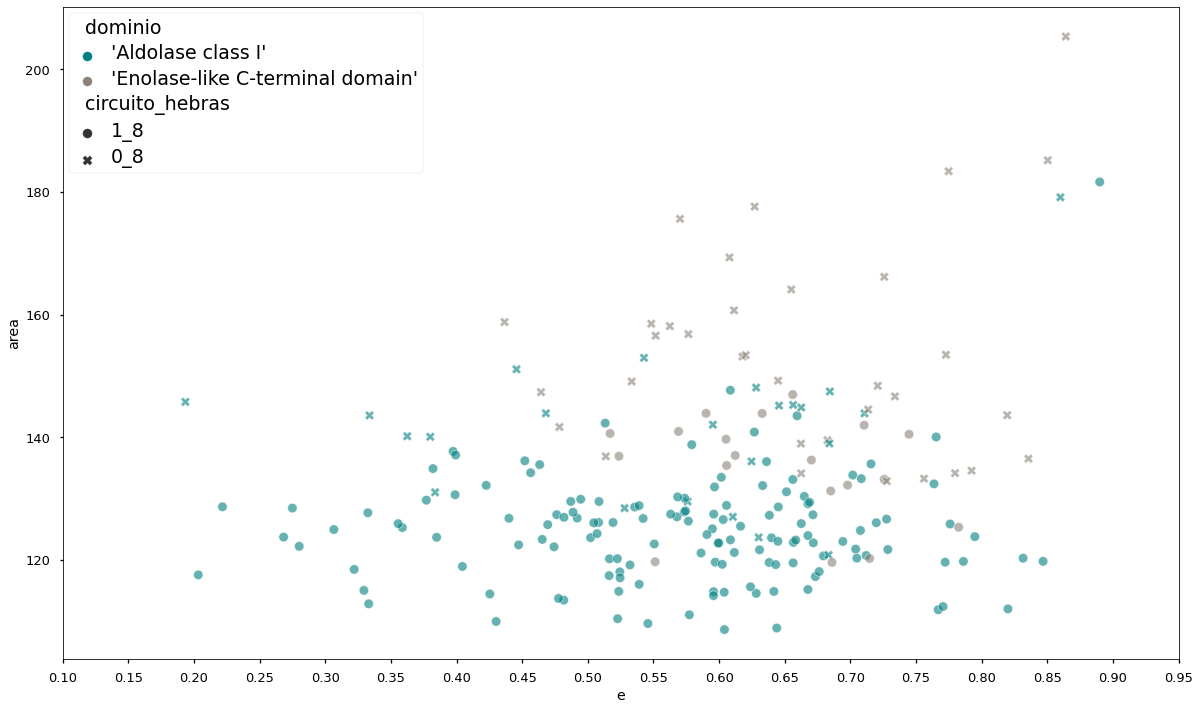

In [112]:
palette29=["#008080","#8B8378","#FFB6C1","#76EEC6","#458B74","#838B8B","#EEEE00","#EEE8AA","#C1CDCD","#000000","#0000FF","#8A2BE2","#9C661F","#A52A2A","#EE3B3B","#7AC5CD","#00008B","#FF9912","#7FFF00","#458B00","#6495ED","#006400","#CAFF70","#68228B","#E9967A","#FF1493","#8B0A50","#00FA9A","#CDB7B5"]
with plt.style.context("seaborn-talk"):
  sns.set_style()
  sns.set_palette(palette29)
  fig, ax = plt.subplots(figsize = (20, 12))
  sns.scatterplot(x=df_E_ea8['e'], y=df_E_ea8['area'], hue=df_E_ea8['dominio'], s=90, marker="o", 
                  style=df_E_ea8['circuito_hebras'], alpha=0.6)
  ax.set_xticks(np.arange(0.1,1,0.05))
  plt.setp(ax.get_legend().get_texts(), fontsize=19)
  correlacion=pd.Series(df_E_ea8['e']).corr(pd.Series(df_E_ea8['area']))

In [104]:
#Muestreando barriles de las 3 familias mas representadas en barriles de 8 hebras.
aldo1= np.random.choice(df_E_ea8.loc[(df_E_ea8['circuito_hebras']=='1_8') & (df_E_ea8['dominio']=="'Aldolase class I'"),'barril'], 10, False)
eno1=np.random.choice(df_E_ea8.loc[(df_E_ea8['circuito_hebras']=='1_8') & (df_E_ea8['dominio']=="'Enolase-like C-terminal domain'"),'barril'], 10, False)

aldo0= np.random.choice(df_E_ea8.loc[(df_E_ea8['circuito_hebras']=='0_8') & (df_E_ea8['dominio']=="'Aldolase class I'"),'barril'], 10, False)
eno0=np.random.choice(df_E_ea8.loc[(df_E_ea8['circuito_hebras']=='0_8') & (df_E_ea8['dominio']=="'Enolase-like C-terminal domain'"),'barril'], 10, False)

In [105]:
df_E_ea8[df_E_ea['barril'].isin(aldo1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,barril,tecnica,circuito,n,e,area,rango rmsd,perim,alfa_prom,alfa_ds,rmsd,angtw,angtw_ds,circuito_hebras,dominio,rmsd_ajuste,count
40,1dqwA00,alncris,1,8,0.651295,131.101710,0-0.25,41.168974,39.815693,9.051923,1.116537,28.310250,9.283054,1_8,'Aldolase class I',0.153079,1
171,1qwgA00,alncris,1,8,0.694217,122.994561,0-0.25,40.111576,37.854020,9.142494,0.999132,28.919898,7.136643,1_8,'Aldolase class I',0.189067,1
214,1vcvA00,alncris,1,8,0.477655,113.715104,- 0.45,37.920782,32.455160,4.710425,0.995486,24.107984,8.193378,1_8,'Aldolase class I',0.291073,1
424,2y7eB00,alncris,1,8,0.671714,122.778336,0-0.25,39.942690,36.586491,4.953561,1.070530,27.172263,6.537808,1_8,'Aldolase class I',0.168996,1
488,3d0cA00,alncris,1,8,0.668863,129.397467,- 0.45,40.989568,37.149150,5.084371,1.040698,27.531164,7.722535,1_8,'Aldolase class I',0.438232,1
560,3kxqA00,alncris,1,8,0.846728,119.763801,0-0.25,41.697500,37.563164,15.895152,0.960569,26.920588,11.613219,1_8,'Aldolase class I',0.132523,1
614,3pm6A00,alncris,1,8,0.568375,130.263991,- 0.45,40.747936,37.228673,15.846841,0.967779,27.208831,14.414587,1_8,'Aldolase class I',0.360477,1
670,3tw6B03,alncris,1,8,0.519184,126.094580,- 0.45,39.990533,38.710399,14.802039,1.095081,27.966633,7.739540,1_8,'Aldolase class I',0.359362,1
722,4df0A00,alncris,1,8,0.676228,118.092230,0-0.25,39.197432,38.706455,3.242849,1.350840,27.906098,9.362884,1_8,'Aldolase class I',0.067845,1
845,5lsmG00,alncris,1,8,0.574365,127.976166,- 0.45,40.403631,34.881461,4.415432,0.961949,26.254792,2.462324,1_8,'Aldolase class I',0.356925,1


In [106]:
df_E_ea8[df_E_ea['barril'].isin(aldo0)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,barril,tecnica,circuito,n,e,area,rango rmsd,perim,alfa_prom,alfa_ds,rmsd,angtw,angtw_ds,circuito_hebras,dominio,rmsd_ajuste,count
184,1sfjB00,alncris,0,8,0.445656,151.079325,0-0.25,43.672124,35.110642,8.289008,0.996239,24.340256,9.582322,0_8,'Aldolase class I',0.098171,1
188,1sznA01,alncris,0,8,0.710687,143.878639,- 0.45,43.507636,32.172114,12.182581,0.991265,26.643966,7.186299,0_8,'Aldolase class I',0.395613,1
223,1vliA01,alncris,0,8,0.859925,179.122616,0-0.25,51.477535,33.189165,4.079361,0.953489,23.058628,6.343048,0_8,'Aldolase class I',0.202242,1
287,2d73A02,alncris,0,8,0.683344,120.800829,- 0.45,39.685191,37.040031,12.362335,1.095738,30.347623,13.518428,0_8,'Aldolase class I',0.305945,1
342,2o7sA01,alncris,0,8,0.379949,140.065142,0-0.25,42.001474,34.316629,5.685157,0.993765,25.345213,8.352802,0_8,'Aldolase class I',0.230900,1
429,2yr1A00,alncris,0,8,0.193472,145.757235,0-0.25,42.800577,36.795416,9.145575,1.007944,26.003808,11.658129,0_8,'Aldolase class I',0.178464,1
432,2z6iA00,alncris,0,8,0.630101,123.664098,- 0.45,39.893978,35.508718,3.261606,0.972791,25.559413,2.950731,0_8,'Aldolase class I',0.420640,1
437,3a21B01,alncris,0,8,0.684334,147.455906,- 0.45,43.851936,32.698514,12.479919,0.994103,24.945000,6.179307,0_8,'Aldolase class I',0.319979,1
657,3t7vA00,alncris,0,8,0.383669,131.014950,0-0.25,40.623865,37.459167,14.227345,1.167880,26.593916,4.790387,0_8,'Aldolase class I',0.078867,1
784,4nzjA02,alncris,0,8,0.645581,145.158640,- 0.45,43.291930,29.872563,13.092252,0.954444,25.434559,17.240755,0_8,'Aldolase class I',0.257547,1


In [107]:
df_E_ea8[df_E_ea['barril'].isin(eno1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,barril,tecnica,circuito,n,e,area,rango rmsd,perim,alfa_prom,alfa_ds,rmsd,angtw,angtw_ds,circuito_hebras,dominio,rmsd_ajuste,count
66,1fhvA01,alncris,1,8,0.725725,133.127105,0-0.25,41.974844,38.618428,16.589849,1.091657,33.445831,15.937909,1_8,'Enolase-like C-terminal domain',0.195605,1
122,1kczA02,alncris,1,8,0.551252,119.688554,0-0.25,39.020666,35.972414,10.117042,0.847170,29.484215,15.012116,1_8,'Enolase-like C-terminal domain',0.200258,1
321,2hzgA02,alncris,1,8,0.605249,139.667458,- 0.45,42.302919,32.650057,7.345742,0.920765,25.124453,8.364651,1_8,'Enolase-like C-terminal domain',0.347757,1
352,2oqhA02,alncris,1,8,0.710443,141.961907,- 0.45,43.214914,36.781148,13.630233,0.774164,30.303583,11.303983,1_8,'Enolase-like C-terminal domain',0.283023,1
357,2oz8A02,alncris,1,8,0.569075,140.945742,0-0.25,42.387522,40.824235,16.513436,1.109920,31.419390,13.071839,1_8,'Enolase-like C-terminal domain',0.177270,1
369,2ps2A02,alncris,1,8,0.714623,120.224611,- 0.45,39.800270,39.183330,18.186772,1.043939,28.328864,16.022007,1_8,'Enolase-like C-terminal domain',0.398398,1
372,2qddA02,alncris,1,8,0.697832,132.197293,0-0.25,41.609872,37.183553,18.316597,0.982321,28.245789,15.639454,1_8,'Enolase-like C-terminal domain',0.198260,1
373,2qdeA02,alncris,1,8,0.590035,143.893898,- 0.65,42.888319,36.071972,18.340268,0.908571,30.203795,12.223168,1_8,'Enolase-like C-terminal domain',0.480910,1
486,3cyjA02,alncris,1,8,0.516947,140.611982,- 0.45,42.226006,37.010751,6.396159,0.989553,27.804323,7.687803,1_8,'Enolase-like C-terminal domain',0.426086,1
520,3go2A02,alncris,1,8,0.523695,136.904200,0-0.25,41.677386,38.317375,8.073927,0.964155,29.495292,10.691730,1_8,'Enolase-like C-terminal domain',0.105844,1


In [108]:
df_E_ea8[df_E_ea['barril'].isin(eno0)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,barril,tecnica,circuito,n,e,area,rango rmsd,perim,alfa_prom,alfa_ds,rmsd,angtw,angtw_ds,circuito_hebras,dominio,rmsd_ajuste,count
111,1jpdX02,alncris,0,8,0.819427,143.590650,- 0.45,44.949645,42.261858,15.893014,0.780623,28.254509,6.580791,0_8,'Enolase-like C-terminal domain',0.428699,1
310,2gdqA02,alncris,0,8,0.576567,156.809107,0-0.25,44.730434,38.735726,8.644830,0.793734,29.373275,12.406006,0_8,'Enolase-like C-terminal domain',0.217011,1
351,2opjA02,alncris,0,8,0.756034,133.245054,- 0.45,42.299081,40.431545,14.824095,1.103681,25.804824,6.033381,0_8,'Enolase-like C-terminal domain',0.339165,1
363,2pgeA02,alncris,0,8,0.772754,153.446036,- 0.65,45.615360,39.828018,17.510527,0.890746,28.890909,6.210328,0_8,'Enolase-like C-terminal domain',0.493650,1
379,2qjjD02,alncris,0,8,0.644857,149.218864,- 0.45,43.889712,37.513040,10.790405,0.602303,27.484160,12.364202,0_8,'Enolase-like C-terminal domain',0.276207,1
491,3ddmA02,alncris,0,8,0.551603,156.556586,- 0.45,44.628489,39.919151,15.504400,0.947881,32.872135,7.507568,0_8,'Enolase-like C-terminal domain',0.390354,1
523,3gy1B02,alncrisff,0,8,0.662500,134.101568,0-0.25,41.693676,37.326003,9.328272,0.787497,27.933963,18.948282,0_8,'Enolase-like C-terminal domain',0.201052,1
542,3ijlA02,alncris,0,8,0.835634,136.499599,- 0.65,44.209331,41.726146,9.831632,0.702824,25.609291,7.371747,0_8,'Enolase-like C-terminal domain',0.474535,1
652,3sjnA02,alncrisff,0,8,0.478362,141.662306,0-0.25,42.325743,34.688464,10.349448,0.921292,29.997718,15.987300,0_8,'Enolase-like C-terminal domain',0.224354,1
769,4m0xA02,alncris,0,8,0.779663,134.146440,0-0.25,42.746428,40.116966,15.507667,0.958707,24.778301,7.546462,0_8,'Enolase-like C-terminal domain',0.112347,1


In [353]:
df_E_ea.groupby(by=['circuito_hebras','dominio'])['barril'].count().sort_values()

circuito_hebras  dominio                                           
0_8              '1, 4-beta cellobiohydrolase'                           1
                 'Phosphoenolpyruvate-binding domains'                   1
                 'Phosphatidylinositol (PI) phosphodiesterase'           1
                 'Glycoside hydrolase/deacetylase'                       1
1_8              'Monomethylamine methyltransferase MtmB'                1
0_8              'Divalent-metal-dependent TIM barrel enzymes'           2
1_8              'GlpP-like'                                             2
                 'D-Lysine 5, 6-aminomutase alpha subunit'               2
1_7              'Aldolase class I'                                      2
1_8              'Copper homeostasis (CutC) domain'                      2
                 'Queuine tRNA-ribosyltransferase-like'                  2
                 'Malate synthase, domain 3'                             2
1_6              'Glycoside hydr